In [45]:
!pip install seaborn

!pip install scikit -learn


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -l


In [46]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns


In [47]:
df=pd.read_csv("Shoe prices.csv")
df.head()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [48]:
df.columns

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price (USD)'],
      dtype='object')

In [49]:
df.shape

(1006, 8)

In [50]:
prices=df["Price (USD)"]
Brand=df["Brand"]

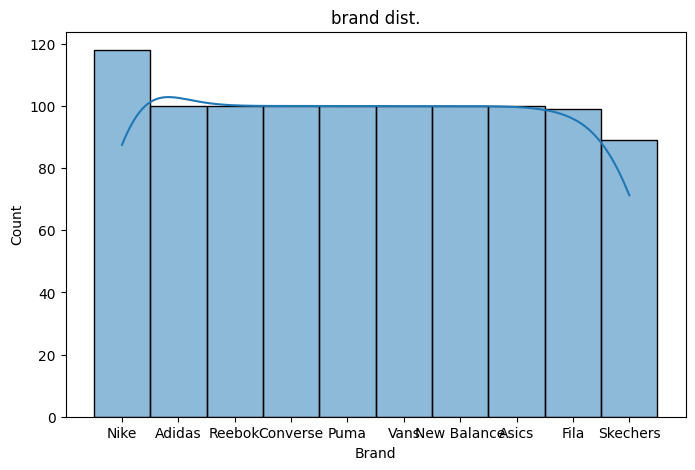

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(Brand,kde=True)
plt.title("brand dist.")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

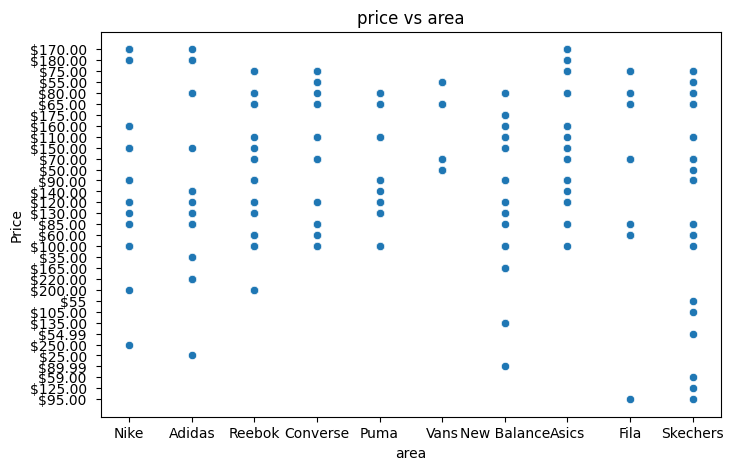

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=Brand,y=prices,data=df)
plt.title("price vs area")
plt.xlabel("area")
plt.ylabel("Price")
plt.show()

In [53]:
!pip install scikit-learn


In [54]:
df=pd.read_csv("Shoe prices.csv")

In [56]:
df.head()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [63]:
for col in df.columns:
    print(f"'{col}'")


'Brand'
'Model'
'Type'
'Gender'
'Size'
'Color'
'Material'
'Price (USD)'


In [55]:
df.isnull().sum()

Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64

In [57]:

df.columns = df.columns.str.strip()


In [65]:
X = df.drop("Price (USD)", axis=1)
y = df["Price (USD)"]


In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [ ]:
# Remove $ sign and spaces, convert to float
df["Price (USD)"] = (
    df["Price (USD)"]
      .str.replace("$", "", regex=False)
      .str.strip()
      .astype(float)
)


In [75]:
for col in df.columns:
    if "price" in col.lower():
        print(f"'{col}'", df[col].dtype)


'Price (USD)' float64


In [76]:
# Normalize column names first
df.columns = (
    df.columns
      .str.strip()
      .str.replace(r"\s+", " ", regex=True)
)

# Clean ALL price columns
for col in df.columns:
    if "price" in col.lower():
        df[col] = (
            df[col]
              .astype(str)
              .str.replace("$", "", regex=False)
              .str.strip()
              .astype(float)
        )


In [77]:
for col in df.columns:
    if "price" in col.lower():
        print(col, df[col].dtype)


Price (USD) float64


In [79]:
X = df.drop("Price (USD)", axis=1)
y = df["Price (USD)"]


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [81]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Get predictions on the test set
y_pred = model.predict(X_test)

# 2. Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 3. Print the results
print("--- Model Performance Report ---")
print(f"R² Score (Accuracy): {r2:.4f}")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")

# 4. Percentage Error (Optional but helpful)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

--- Model Performance Report ---
R² Score (Accuracy): 0.9227
Mean Absolute Error: $6.01
Root Mean Squared Error: $10.74
Mean Absolute Percentage Error: 6.24%


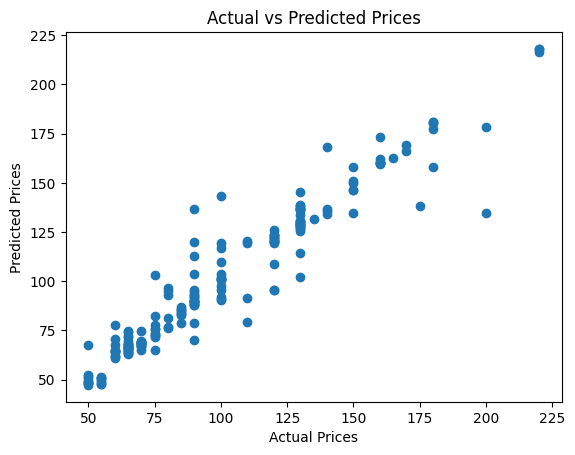

In [83]:
# Plot 
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [87]:
import pandas as pd

# 1. Define your sample data (ensure column names match your CSV exactly)
sample_shoe = pd.DataFrame({
    'Brand': ['Nike'],
    'Model': ['Air Max 270'],
    'Type': ['basket ball'],
    'Gender': ['women'],
    'Size': ['US 10'],
    'Color': ['White'],
    'Material': ['leather']
})

# 2. Use the fitted pipeline to predict the price
# Note: 'model' is the name of the Pipeline you created in Cell 17
predicted_price = model.predict(sample_shoe)

# 3. Display the result
print(f"Predicted Price: ${predicted_price[0]:.2f}")

Predicted Price: $130.16


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Get predictions on the test set
y_pred = model.predict(X_test)

# 2. Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 3. Print the results
print("--- Model Performance Report ---")
print(f"R² Score (Accuracy): {r2:.4f}")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")

# 4. Percentage Error (Optional but helpful)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

--- Model Performance Report ---
R² Score (Accuracy): 0.9227
Mean Absolute Error: $6.01
Root Mean Squared Error: $10.74
Mean Absolute Percentage Error: 6.24%


In [90]:
import joblib

# Save the model to a file
joblib.dump(model, 'shoe_price_model.joblib')

print("Model saved successfully using Joblib!")

Model saved successfully using Joblib!


In [91]:
# Loading with Joblib
loaded_model = joblib.load('shoe_price_model.joblib')

# Now you can use it immediately
prediction = loaded_model.predict(sample_shoe)
print(prediction)

[130.16143472]
